In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from statistics import mean 

In [77]:
warnings.simplefilter('ignore')
seed = 123

In [3]:
song_df = pd.read_csv("C:\\Users\\daedlow\\Documents\\jupyter_notebook\\df_audio_features_5000_cleaned_whitespaces.csv")
song_df.set_index(["name", "artist"], inplace=True)
song_df.drop(["id", "html", "type"], axis=1, inplace=True)

In [4]:
song_df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4


In [ ]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')
    plt.show()

In [ ]:
show_boxplot(song_df)

In [ ]:
def remove_outliers(data):
   
    df = data.copy()
   
    for col in list(df.columns):
 
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df = df[(df[str(col)] >= lower_bound) & 
        (df[str(col)] <= upper_bound)]
    return df

In [ ]:
song_df_no_outliers = remove_outliers(song_df)

In [ ]:
show_boxplot(song_df_no_outliers)

In [ ]:
sns.heatmap(song_df_no_outliers.corr(), vmin=-1, vmax=1, annot=True);
plt.show()

## Scaling minmax

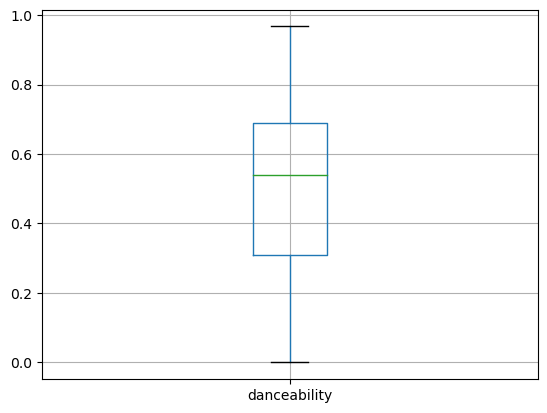

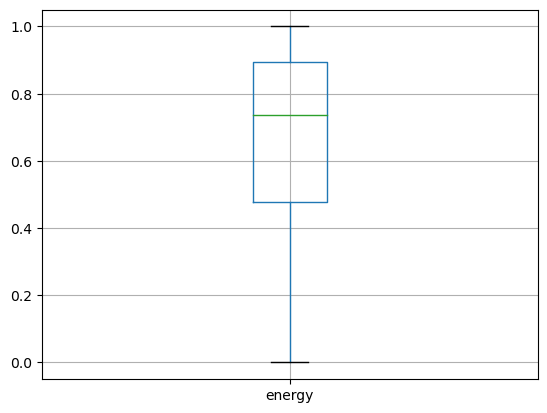

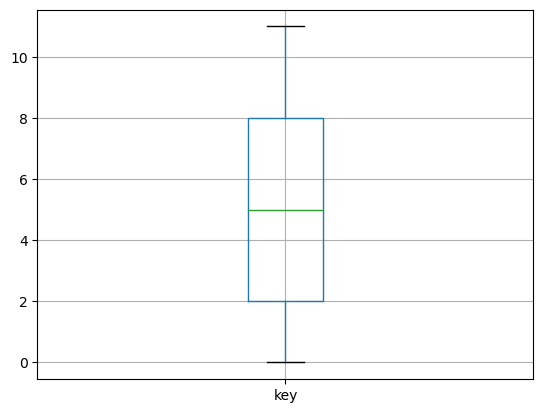

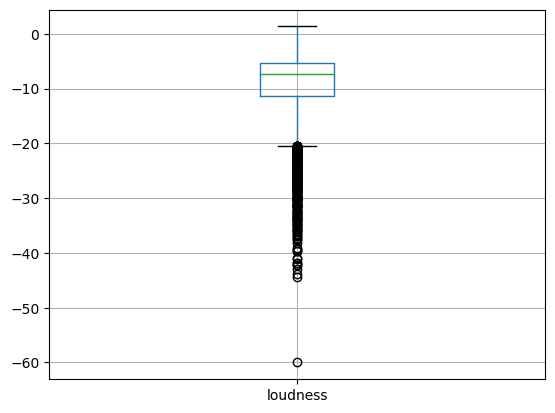

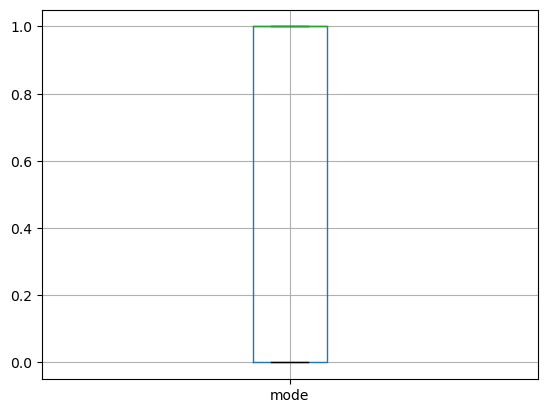

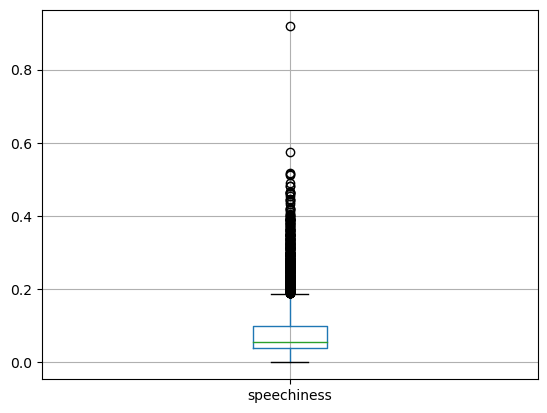

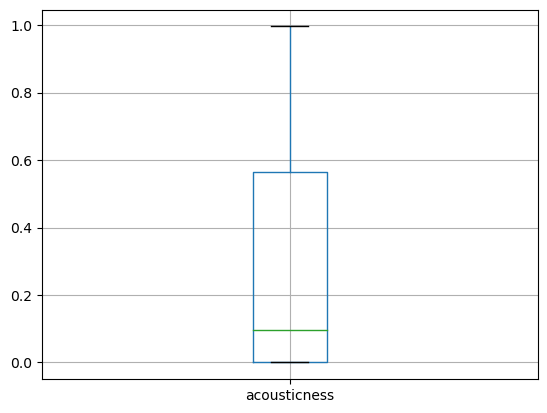

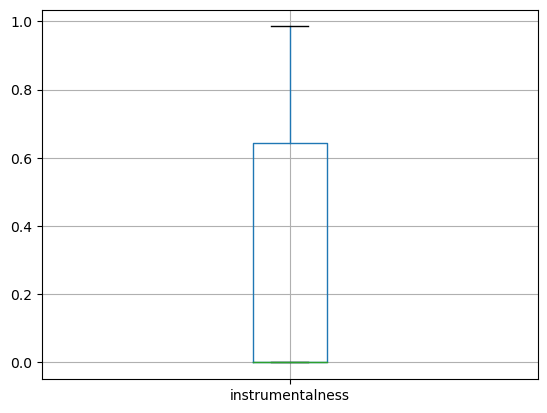

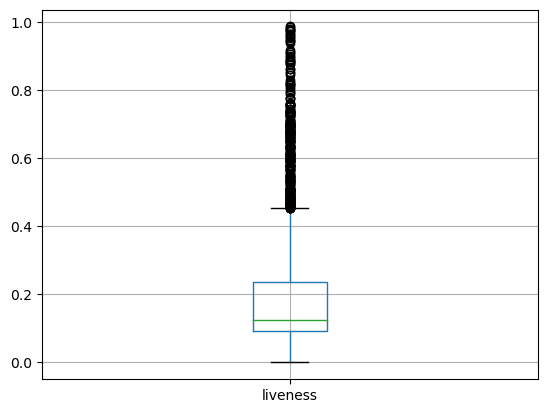

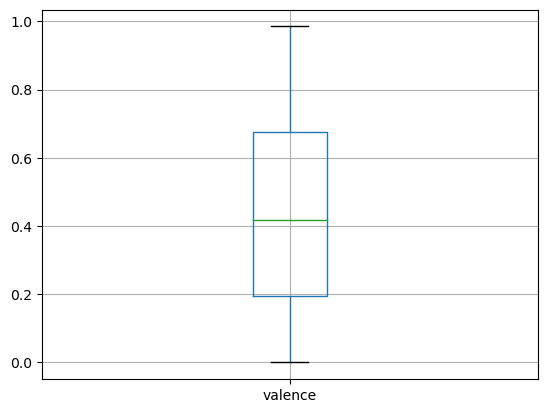

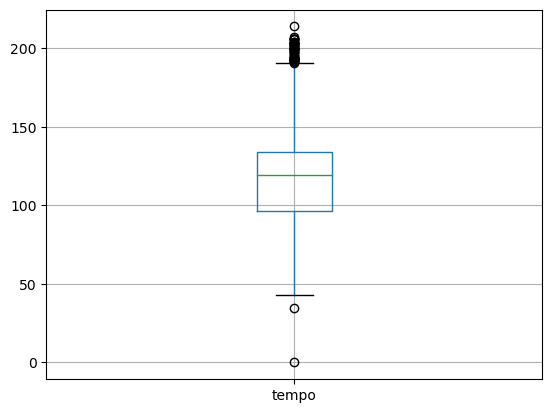

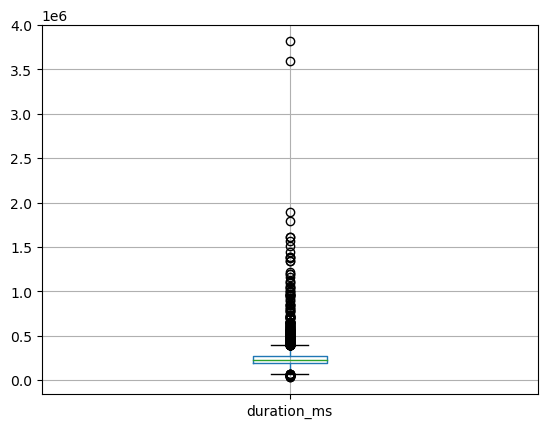

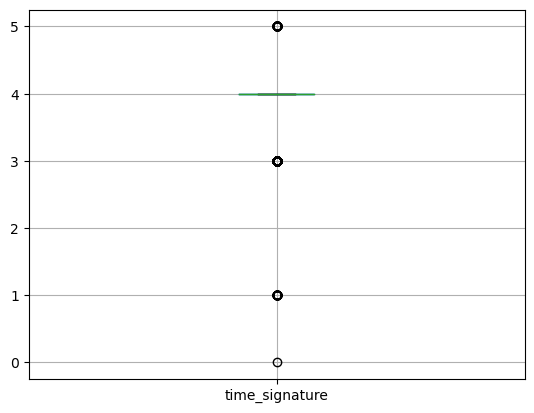

In [6]:
for i in song_df.columns:
    song_df.boxplot(column=i)
    plt.show() # outliers: loudness, speechiness, (liveness), tempo, duration_ms, (time_signature)

In [5]:
song_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5.235000e+03,5235.000000
mean,0.509503,0.653565,5.254441,-9.338098,0.646227,0.083178,0.290043,0.257337,0.185354,0.443596,118.721407,2.479112e+05,3.902961
std,0.218041,0.288335,3.571559,6.294850,0.478185,0.071193,0.355985,0.370686,0.149410,0.277725,28.568463,1.356330e+05,0.420324
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.276000e+04,0.000000
25%,0.309000,0.479000,2.000000,-11.337000,0.000000,0.039000,0.002450,0.000001,0.092500,0.196000,96.174000,1.899910e+05,4.000000
50%,0.539000,0.738000,5.000000,-7.338000,1.000000,0.055800,0.095400,0.001880,0.125000,0.417000,119.180000,2.246670e+05,4.000000
75%,0.688000,0.893000,8.000000,-5.264000,1.000000,0.098650,0.565500,0.643000,0.237000,0.677000,134.019000,2.717200e+05,4.000000
max,0.967000,1.000000,11.000000,1.342000,1.000000,0.918000,0.996000,0.985000,0.987000,0.985000,213.990000,3.815787e+06,5.000000


In [6]:
song_df.groupby(by="time_signature").count()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
time_signature,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1
1,52,52,52,52,52,52,52,52,52,52,52,52
3,419,419,419,419,419,419,419,419,419,419,419,419
4,4692,4692,4692,4692,4692,4692,4692,4692,4692,4692,4692,4692
5,71,71,71,71,71,71,71,71,71,71,71,71


# Kmeans with all data

In [92]:
# list of all inertia values of different numbers of clusters
inertia_list = []
sil_scores  = []
for i in range(20,100):
    myKMeans_o = KMeans(n_clusters=i)
    myKMeans_o.fit_transform(df_scaled)
    inertia_list.append(round(myKMeans.inertia_))
    sil_scores.append(silhouette_score(df_scaled, myKMeans.labels_))

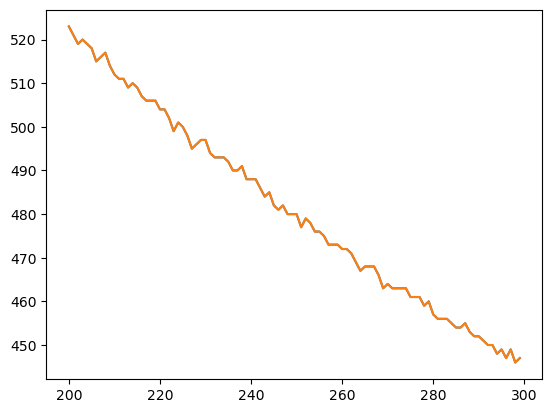

In [36]:
plt.plot(range(20,100), inertia_list);
plt.show()

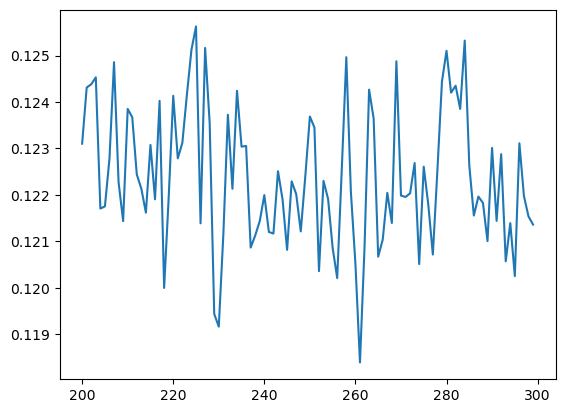

In [37]:
plt.plot(range(20,100), sil_scores);
plt.show()

In [69]:
from statistics import mean 
mean(sil_scores), mean(sil_scores[100:200]) # not better kicking outliers out

(0.12238398787587158, 0.12530905478531038)

# Hierarchical Clustering

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [17]:
df_sk_pre_no_outliers = MinMaxScaler(feature_range=(0,1)).fit_transform(song_df_no_outliers)
df_scaled_no_outliers = pd.DataFrame(df_sk_pre_no_outliers, columns=song_df_no_outliers.columns, index=song_df_no_outliers.index)
len(df_scaled_no_outliers)

5136

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(df_scaled_no_outliers, method="complete", metric="euclidean")
average_clustering = linkage(df_scaled_no_outliers, method="average", metric="euclidean")
single_clustering = linkage(df_scaled_no_outliers, method="single", metric="euclidean")

# check ward

In [50]:
ward_cluster = linkage(df_scaled_no_outliers, method='ward', metric='euclidean')

AttributeError: 'numpy.ndarray' object has no attribute 'fit_predict'

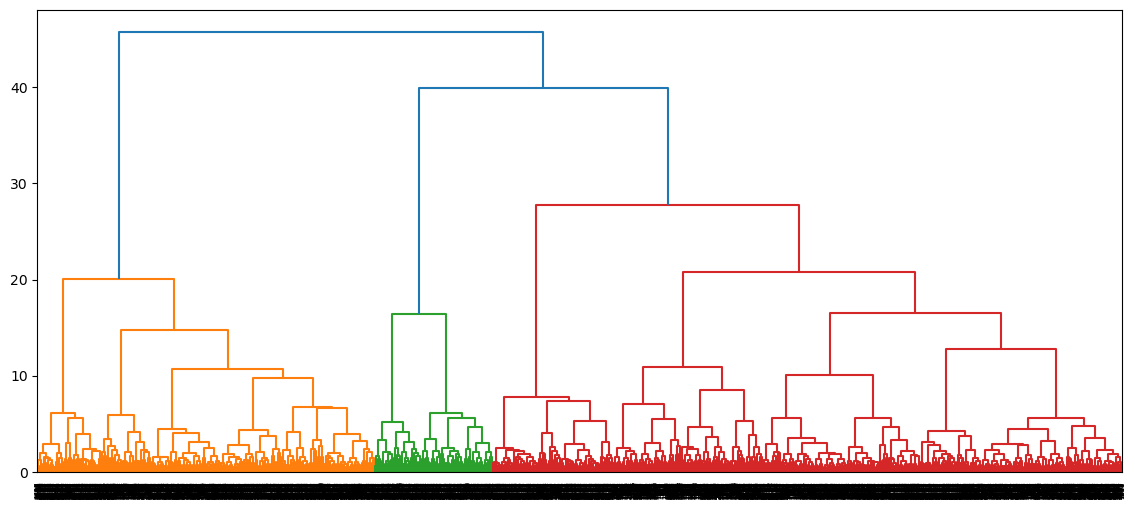

In [78]:
dendrogram(ward_cluster)
plt.show()

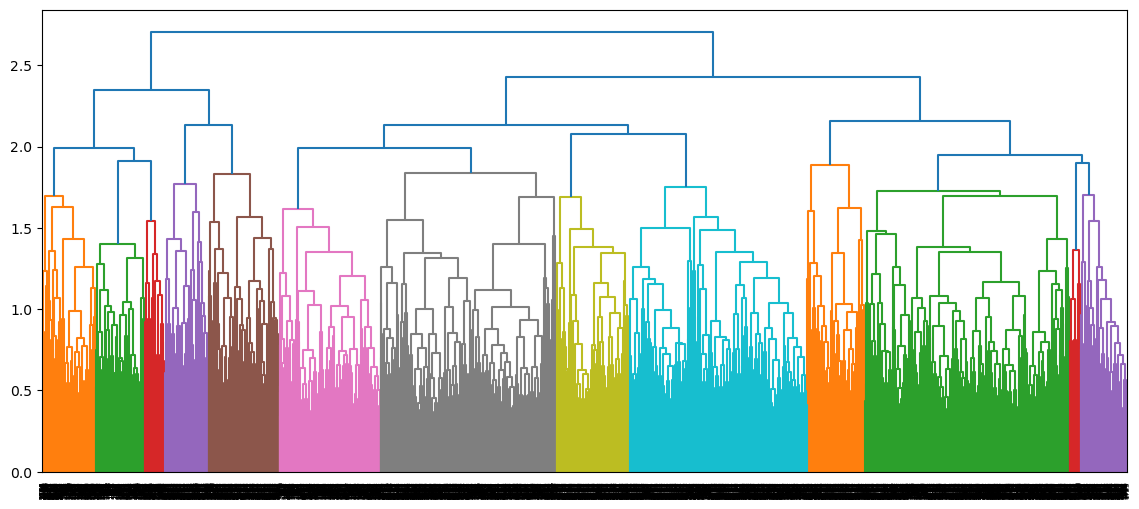

In [84]:
dendrogram(complete_clustering)
plt.show()

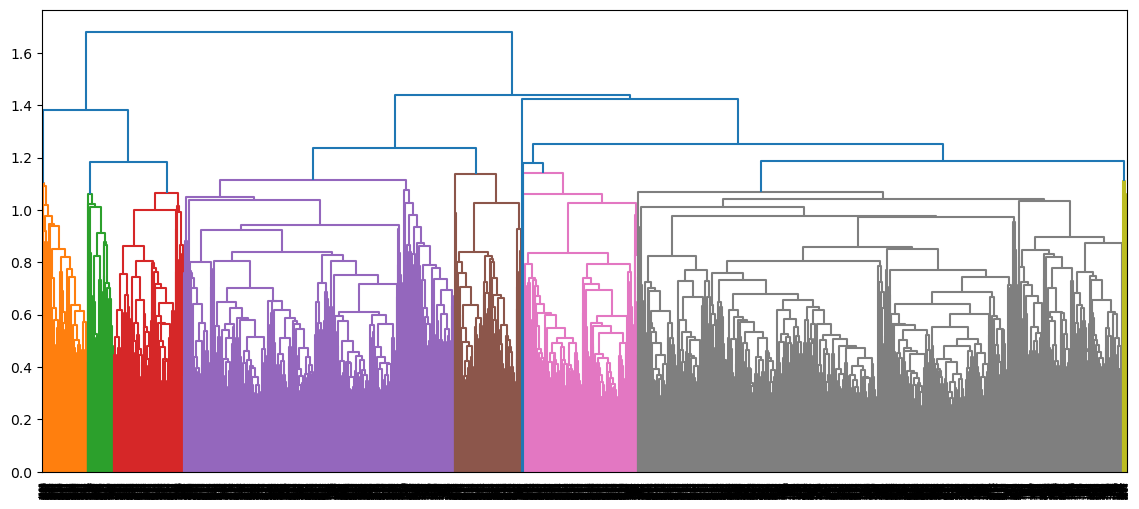

In [85]:
dendrogram(average_clustering)
plt.show()

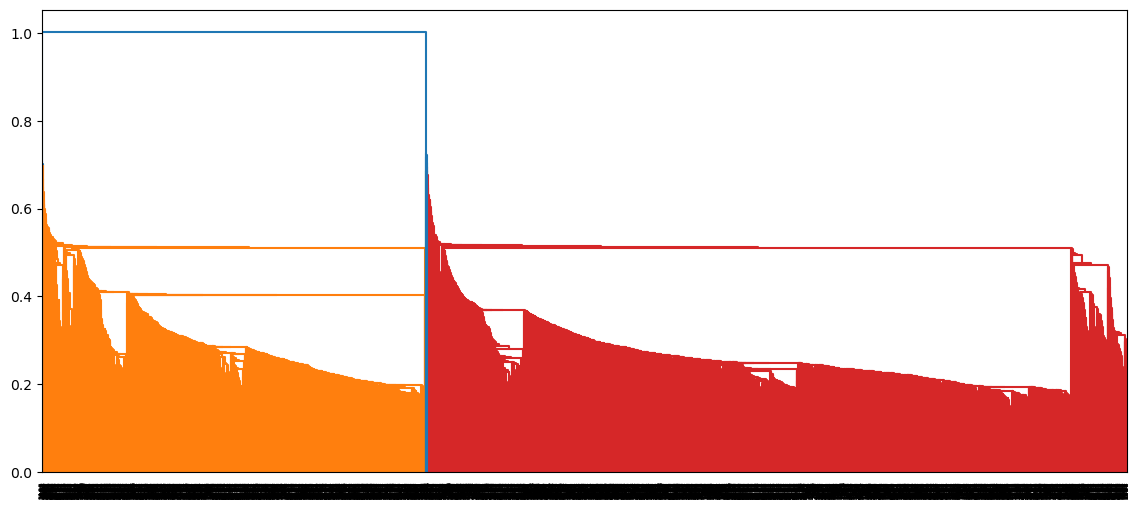

In [86]:
dendrogram(single_clustering)
plt.show()

# KMeans with cleaned data (no outliers via 1,5* IQR)

In [62]:
inertia_list_o = []
sil_scores_o = []
for i in range(20,100):
    myKMeans_o = KMeans(n_clusters=i, random_state=seed)
    myKMeans_o.fit_transform(df_scaled_no_outliers)
    inertia_list_o.append(round(myKMeans_o.inertia_))
    sil_scores_o.append(silhouette_score(df_scaled_no_outliers, myKMeans_o.labels_))
    print(i)

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


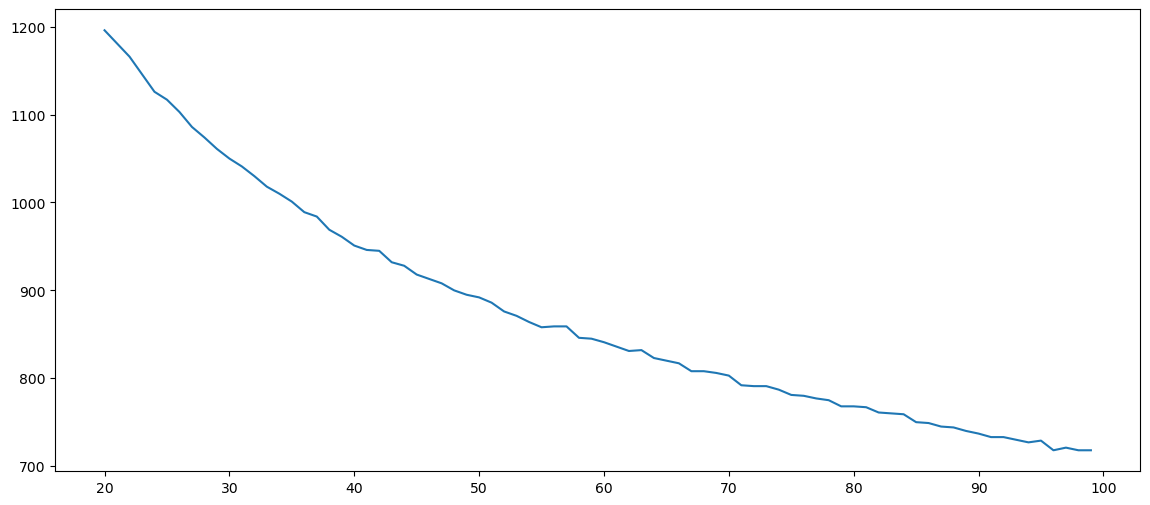

In [24]:
plt.plot(range(20,100), inertia_list_o);
plt.show()

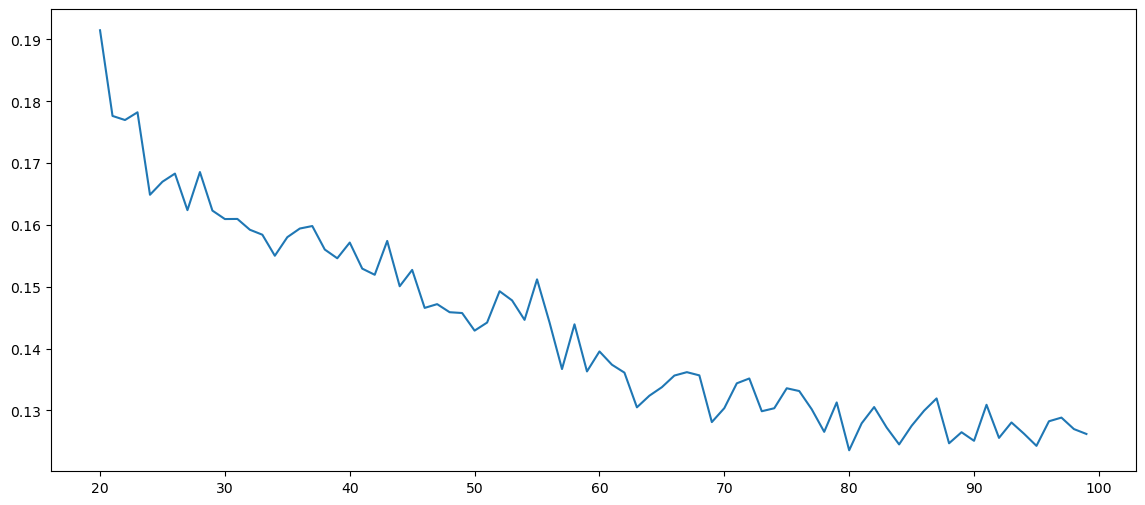

In [25]:
plt.plot(range(20,100), sil_scores_o);
plt.show()

In [30]:
for i in range(80):
    print(i+20, sil_scores_o[i])

20 0.19149026721238088
21 0.17763093525797663
22 0.1769701982440922
23 0.1782209622256805
24 0.16487782103431095
25 0.1669894640635577
26 0.16830400684840563
27 0.1623904126897847
28 0.1685517001360454
29 0.16231604393083068
30 0.16094730570500898
31 0.16096637263860825
32 0.15921929194518267
33 0.15841559176418593
34 0.1550109864903562
35 0.1580162355448883
36 0.15941435233266812
37 0.15981832078284572
38 0.15601660186331276
39 0.15460175401018864
40 0.15714568753063865
41 0.15292753836758824
42 0.15193230907596278
43 0.15740811823765685
44 0.15007526323905487
45 0.15271973694222482
46 0.14657367265249316
47 0.1471817430351346
48 0.14587489426098837
49 0.1457448562803403
50 0.14289635380911717
51 0.1442024377342587
52 0.1492699041420015
53 0.14778764642710698
54 0.1446373317324755
55 0.1511882784584091
56 0.1442226340921582
57 0.13667926222272073
58 0.14391610843360425
59 0.13629468254526922
60 0.139529193094355
61 0.1373807906796114
62 0.13609927502207086
63 0.13048566943782125
64 0.

In [31]:
myKMeans_o = KMeans(n_clusters=55, random_state=seed)
myKMeans_o.fit_transform(df_scaled_no_outliers)
song_df_no_outliers["cluster"] = myKMeans_o.labels_

In [33]:
song_df_no_outliers.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4,46
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4,10
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4,36
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4,40
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4,15


In [42]:
song_df_no_outliers.loc[song_df_no_outliers["cluster"]==46, :].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
count,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0
mean,0.536760,0.236132,9.060000,-13.877680,0.0,0.055662,0.817760,0.051891,0.205496,0.317660,122.347800,256086.720000,3.780000,46.0
std,0.163971,0.127237,1.530773,4.186283,0.0,0.040440,0.168155,0.114574,0.220163,0.154693,25.575017,98725.396537,0.418452,0.0
min,0.181000,0.014100,6.000000,-22.466000,0.0,0.028900,0.356000,0.000000,0.079200,0.034300,71.178000,102040.000000,3.000000,46.0
25%,0.423500,0.132250,8.000000,-16.798500,0.0,0.035425,0.709500,0.000054,0.099475,0.211250,110.376000,192133.250000,4.000000,46.0
50%,0.550000,0.230000,9.000000,-13.053500,0.0,0.045150,0.880500,0.000972,0.123500,0.314000,124.311500,239482.500000,4.000000,46.0
75%,0.656750,0.316750,10.000000,-11.473250,0.0,0.060725,0.951000,0.028055,0.193250,0.404750,137.207750,282233.500000,4.000000,46.0
max,0.853000,0.579000,11.000000,-5.928000,0.0,0.293000,0.987000,0.499000,0.975000,0.687000,171.988000,659520.000000,4.000000,46.0


In [41]:
song_df_no_outliers.groupby(by="cluster").count()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,47,47,47,47,47,47,47,47,47,47,47,47,47
1,187,187,187,187,187,187,187,187,187,187,187,187,187
2,116,116,116,116,116,116,116,116,116,116,116,116,116
3,107,107,107,107,107,107,107,107,107,107,107,107,107
4,64,64,64,64,64,64,64,64,64,64,64,64,64
5,71,71,71,71,71,71,71,71,71,71,71,71,71
6,61,61,61,61,61,61,61,61,61,61,61,61,61
7,98,98,98,98,98,98,98,98,98,98,98,98,98
8,42,42,42,42,42,42,42,42,42,42,42,42,42


# Getting rid of correlating features

In [53]:
df_scaled_no_acoustic = df_scaled_no_outliers

In [64]:
df_scaled_no_acoustic = df_scaled_no_acoustic.loc[:, df_scaled_no_acoustic.columns != "acousticness"]

In [65]:
inertia_list_a = []
sil_scores_a = []
for i in range(20,100):
    myKMeans_a = KMeans(n_clusters=i, random_state=seed)
    myKMeans_a.fit_transform(df_scaled_no_acoustic)
    inertia_list_a.append(round(myKMeans_a.inertia_))
    sil_scores_a.append(silhouette_score(df_scaled_no_acoustic, myKMeans_a.labels_))
    print(i)

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


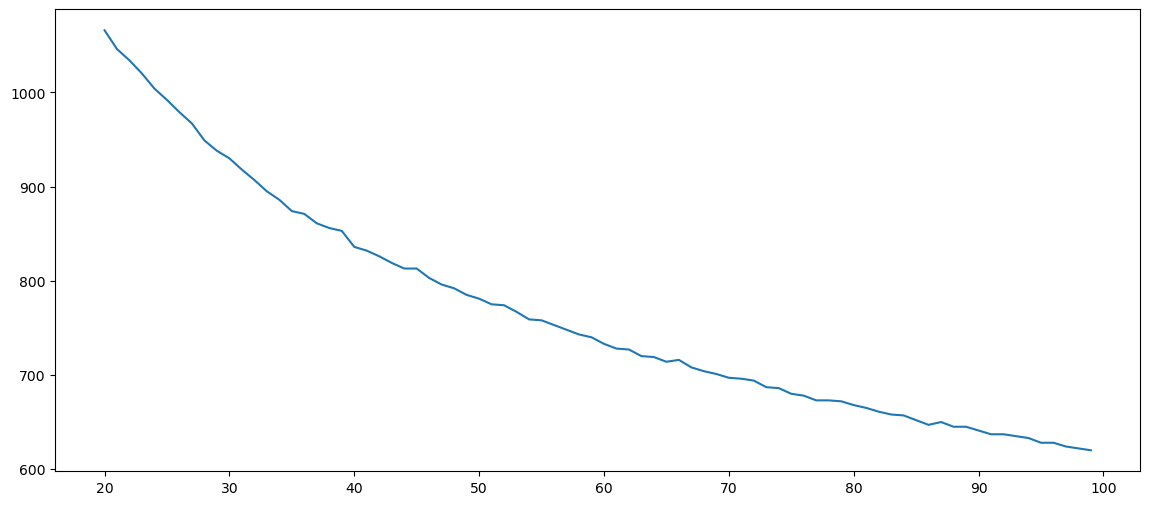

In [66]:
plt.plot(range(20,100), inertia_list_a);
plt.show()

In [67]:
for i in range(80):
    print(i+20, sil_scores_a[i])

20 0.18729833204157217
21 0.17805642015923856
22 0.17372434271935464
23 0.17386410391890664
24 0.16050382646157185
25 0.16300134661492832
26 0.1643307654243816
27 0.16494043591998092
28 0.16734049853226807
29 0.1666957173801177
30 0.16129413246504795
31 0.1574824096432159
32 0.15325082236240517
33 0.166433531672457
34 0.15972912082981056
35 0.15989346929068327
36 0.15845047538850823
37 0.16161598159622018
38 0.15652334241761637
39 0.157689238938248
40 0.159397071479597
41 0.1576893181498024
42 0.15361466526172057
43 0.15035260726138158
44 0.1555003430563103
45 0.1457554812200941
46 0.14952840762619196
47 0.14553291047506323
48 0.1472797369598655
49 0.1524411102034922
50 0.14651432623217242
51 0.14687882032978733
52 0.1443792505867253
53 0.14643384897388395
54 0.14365218164302
55 0.14347396530559375
56 0.14277201095491712
57 0.14337831313494237
58 0.14251386597102503
59 0.1377548141993181
60 0.14744781564756776
61 0.14467964367335023
62 0.14294569736903717
63 0.13543502635309515
64 0.13

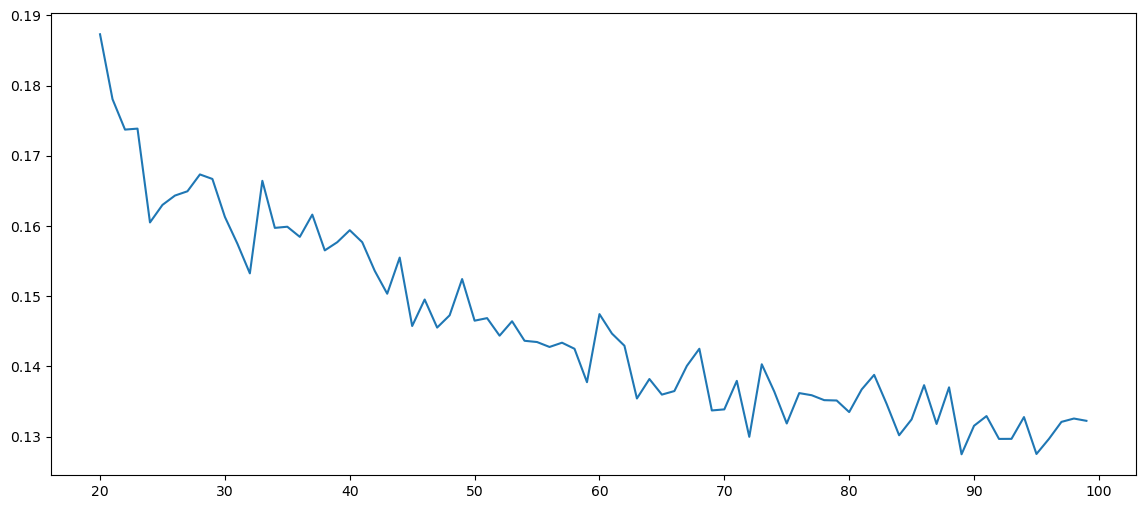

In [68]:
plt.plot(range(20,100), sil_scores_a);
plt.show()

In [85]:
mean(sil_scores_o), mean(sil_scores_a)

(0.14316419447721934, 0.1456011141558363)

In [71]:
myKMeans_a = KMeans(n_clusters=60 , random_state=seed)
myKMeans_a.fit_transform(df_scaled_no_acoustic)
song_df_no_outliers["cluster_no_acoustic_60"] = myKMeans_a.labels_

In [73]:
song_df_no_outliers.groupby(by="cluster_no_acoustic_60").count()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
cluster_no_acoustic_60,,,,,,,,,,,,,,
0,34,34,34,34,34,34,34,34,34,34,34,34,34,34
1,133,133,133,133,133,133,133,133,133,133,133,133,133,133
2,138,138,138,138,138,138,138,138,138,138,138,138,138,138
3,72,72,72,72,72,72,72,72,72,72,72,72,72,72
4,218,218,218,218,218,218,218,218,218,218,218,218,218,218
5,183,183,183,183,183,183,183,183,183,183,183,183,183,183
6,50,50,50,50,50,50,50,50,50,50,50,50,50,50
7,140,140,140,140,140,140,140,140,140,140,140,140,140,140
8,74,74,74,74,74,74,74,74,74,74,74,74,74,74


In [89]:
song_df_no_outliers.loc[song_df_no_outliers["cluster_no_acoustic_60"]==47,]

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster,cluster_no_acoustic_60
name,artist,,,,,,,,,,,,,,,
I. Adagio sostenuto,Ludwig van Beethoven,0.1410,0.001230,1,-43.851,0,0.0429,0.994,0.942,0.1100,0.0843,78.155,313480,3,5,47
III. Andante,Antonio Vivaldi,0.4510,0.026900,4,-26.297,0,0.0426,0.978,0.825,0.1180,0.3180,118.879,211707,3,51,47
Nocturne in C Sharp,Frédéric Chopin,0.2610,0.279000,6,-13.137,0,0.0462,0.975,0.838,0.1560,0.0619,87.478,273493,3,51,47
Upland,Olivia Belli,0.1890,0.039300,10,-28.088,0,0.0342,0.990,0.878,0.1010,0.1550,166.709,178147,3,51,47
Reforestation (Episode 5 - Humans),Ilan Eshkeri,0.4670,0.181000,9,-17.723,0,0.0320,0.295,0.816,0.1740,0.0516,126.076,100853,3,51,47
Mirror Symmetry - Solo Piano Version,Piano Novel,0.4180,0.115000,6,-21.118,0,0.0414,0.989,0.944,0.0871,0.2980,136.305,123547,3,51,47
"I'm Going to Make a Cake (from ""The Hours"" Soundtrack)",Philip Glass,0.1680,0.035800,9,-24.464,0,0.0385,0.987,0.864,0.0659,0.0354,81.364,184573,3,51,47
"Nostalgie du pays, extrait des Miniatures polonaises",Milosz Magin,0.4730,0.003640,2,-39.075,0,0.0407,0.993,0.936,0.1270,0.2030,70.698,117240,3,5,47
That Voice,Anne Chmelewsky,0.5090,0.130000,4,-17.492,0,0.0348,0.972,0.784,0.0899,0.0938,119.936,117213,3,51,47


# Plotting with t-SNE

In [ ]:
import plotly.express as px
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification( # X: dataset, y: labels
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)


fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.show()

In [ ]:
X# an array, no col names etc
y# an array with column names (as numbers)

In [ ]:
song_df.head()

In [ ]:
fig = px.scatter_3d(x=song_df["tempo"], y=song_df["speechiness"], z=song_df["instrumentalness"], color=song_df["clusters"], opacity=0.8)
fig.show()

In [ ]:
fig.update_layout(
    title="PCA visualization of Customer Churn dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)

## Scaling Robust (dropped)

In [ ]:
song_df.sort_values(by="duration_ms", ascending = False).head()

In [ ]:
robust_input = song_df.copy()
robust_input = robust_input[robust_input["duration_ms"] != 3815787]
robust_input = robust_input[robust_input["duration_ms"] != 3590693]

In [ ]:
len(robust_input)

In [ ]:
from sklearn.preprocessing import RobustScaler
#robust_input.drop("clusters", axis=1, inplace=True)
df_sk_pre_robust = RobustScaler().fit_transform(robust_input)
df_robust_scaled = pd.DataFrame(df_sk_pre_robust, columns=robust_input.columns, index=robust_input.index)

In [ ]:
robust_inertia_list = []

for i in range(20,60):
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(df_robust_scaled)
    robust_inertia_list.append(round(myKMeans.inertia_))
    
plt.plot(range(20,60), robust_inertia_list);

In [ ]:
robust_sil_scores = []

for i in range(20,60):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(df_robust_scaled)
    robust_sil_scores.append(silhouette_score(df_robust_scaled, km.labels_))

plt.plot(range(20,60), robust_sil_scores);

In [ ]:
for i in range(0,40):
    print(i+20, robust_sil_scores[i])